# Установка и импорт необходимых модулей



In [1]:
!pip install catboost
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=c83ef50a343ce9d1d2bb1f504d4bb22b04528fce37114da72a65eb46607fc964
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
# при работе через Google Colab
# прописать путь до всех файлов py
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Учёба/8 семестр/диплом/Проект/VKR/Блокноты')

Mounted at /content/drive


In [3]:
import AnalysisFunc
import BaseFuncs
import PredictionSplit
import PredictionResults

ДЛЯ ПРОГНОЗИРОВАНИЙ ДОСТУПНЫ СЛЕДУЮЩИЕ ПОДСЧЕТЫ ОШИБОК/ТОЧНОСТЕЙ:
recall
f1
r2
mae


In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDClassifier, RidgeCV, RidgeClassifierCV
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from itertools import chain

# Загрузка данных прошлого года и нынешнего
Для прошлого года создаются датафреймы с очищенными выбросами по Q и Z

In [6]:
data = BaseFuncs.GetDataFrameListFromFileConverted("/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/Преобразованные/ПиОА 1 div20kr.csv")
data = AnalysisFunc.MakeFloat(data, ["Пол"])
data_Q = AnalysisFunc.DeleteByQuantile(data, 0.15)
data_Z = AnalysisFunc.DeleteByZ(data)
data_dict = {"Original": data} #, "Квартиль": data_Q, "По Z": data_Z}
data.head(5)

,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Корень дисперсии баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Корень дисперсии баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Корень дисперсии баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,0,0.93,0.160,0.888889,0.216933,0.600,1.0,0.060,0.75,0.000000,0.6000,0.43,0.10,0.833333,0.159034,0.600
1,1.0,1,1.00,0.035,0.333333,0.269942,0.369,1.0,0.012,0.50,0.045264,0.2245,1.00,0.00,0.000000,0.000000,0.375
2,1.0,1,0.00,0.000,0.000000,0.000000,0.000,0.0,0.000,0.00,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000
3,0.0,0,1.00,0.150,0.888889,0.208160,0.585,1.0,0.060,0.75,0.133156,0.5900,1.00,0.08,0.666667,0.201164,0.775
4,0.0,0,0.86,0.160,0.888889,0.422833,0.224,0.5,0.060,0.75,0.000000,0.5040,1.00,0.08,0.666667,0.201164,0.750


In [7]:
dataReal = BaseFuncs.GetDataFrameListFromFileConverted("/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/Преобразованные/ПиОА тест div20kr.csv")
dataReal = AnalysisFunc.MakeFloat(dataReal, ["Пол"])
dataReal.head(5)

,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Корень дисперсии баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Корень дисперсии баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Корень дисперсии баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,1,0.3,0.048,0.375,0.733212,0.050,0.2,0.025,0.50,0.193059,0.000,0.25,0.093,0.714286,0.191007,0.000
1,0.0,0,0.7,0.160,1.000,0.800000,0.455,0.8,0.090,1.00,0.239287,0.652,0.75,0.100,0.571429,0.248117,0.550
2,1.0,1,1.0,0.000,0.000,0.000000,0.150,0.8,0.000,0.00,0.000000,0.000,0.12,0.000,0.000000,0.000000,0.000
3,1.0,1,0.9,0.020,0.250,0.458258,0.095,1.0,0.085,0.75,0.365210,0.085,1.00,0.020,0.285714,0.253503,0.285
4,1.0,1,0.5,0.020,0.125,0.600000,0.190,0.2,0.000,0.00,0.137337,0.000,0.12,0.000,0.000000,0.092148,0.000


# Словари моделей прогнозирования

In [11]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

models = {  "k-ближайших соседей": KNeighborsClassifier(leaf_size=20, metric='chebyshev', n_neighbors=11, p=1, weights='uniform'),
            "Рандомный лес": RandomForestClassifier(max_depth=1, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100),
            "Дерево решений": DecisionTreeClassifier(max_depth=9, random_state=0),
            "CatBoost": CatBoostClassifier(iterations=51, learning_rate=0.05, silent=True, allow_writing_files=False),
            "AdaBoostClassifier": AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1.0, n_estimators=31),
            "Логистическая регрессия": LogisticRegression(),
            "SGDClassifier": SGDClassifier(),
            "RidgeClassifierCV": RidgeClassifierCV(),
            "NearestCentroid": NearestCentroid(),
            "SVC": SVC()}
models_regres = { "k-ближайших соседей": KNeighborsRegressor(leaf_size=34, metric='minkowski', n_neighbors= 14, p=1, weights='uniform'),
            "Рандомный лес": RandomForestRegressor(bootstrap=True, max_depth=4, max_features='log2', min_samples_leaf=3, min_samples_split=3, n_estimators=6),
            "CatBoostRegressor": CatBoostRegressor(iterations=151, learning_rate=0.05, depth=6, silent=True, allow_writing_files=False),
            "AdaBoostRegressor": AdaBoostRegressor(learning_rate=0.01, loss='square', n_estimators=12), #), \
            "Ridge": Ridge(),  \
            "LinearRegression": LinearRegression(),
                  "RidgeCV": RidgeCV()}

models_regres_classes = { "k-ближайших соседей": KNeighborsClassifier(leaf_size=20, metric='minkowski', n_neighbors=8, p=1, weights='distance'),
            "Логистическая регрессия": LogisticRegression(),
                 "LinearDiscriminantAnalysis":         LinearDiscriminantAnalysis(),
            # "Наивный байес": GaussianNB(),
            # "Метод опорных векторов": SVC(),
            "Рандомный лес": RandomForestClassifier(max_depth=15, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100),
            "Дерево решений": DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter='random'),
            "CatBoost": CatBoostClassifier(iterations=181, learning_rate=0.05, silent=True, allow_writing_files=False),
            "AdaBoostClassifier": AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1.0, n_estimators=45)}

# ИНФО

**Разделение датафреймов на X и Y** происходит через функции:

`PredictionSplit.SplitTestTrainPass(data, exam, not_for_prediction)` (Y - отметки о сдаче)

`PredictionSplit.SplitTestTrainTest(data, exam, not_for_prediction)` (Y - отметки о баллах контрольной)

где `not_for_prediction` - список параметров, которые не должны выходить в выборку X

**Прогнозирование** производится через функции:


---

**Получение словаря с ошибками/точностями**, где ключи - названия моделей из словаря `models`
`PredictionResults.PredictionModel(X, Y, models, test_size, accuracy_type)`

и

`PredictionResults.PredictionModelNew(X, Y, x_, y_, models, accuracy_type)`


---


**Получение словаря с матрицами ошибок**, где ключи - названия моделей из словаря `models`
`PredictionResults.PredictionModelMatrix(X, Y, models, test_size)`

и

`PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)`


---


`accuracy_type` берется из словаря:


```
accuracy_dict = {
    "recall": recall_score,
    "f1": f1_score,
    "r2": r2_score,
    "mae": mean_absolute_error
}
```



# Прогнозирование train_split
Данные прошлого года делятся на тренировочную и тестовую выборку (проверка для оригинальных данных, так и для очищенных)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       192
           1       0.90      0.91      0.90        97

    accuracy                           0.93       289
   macro avg       0.93      0.93      0.93       289
weighted avg       0.93      0.93      0.93       289





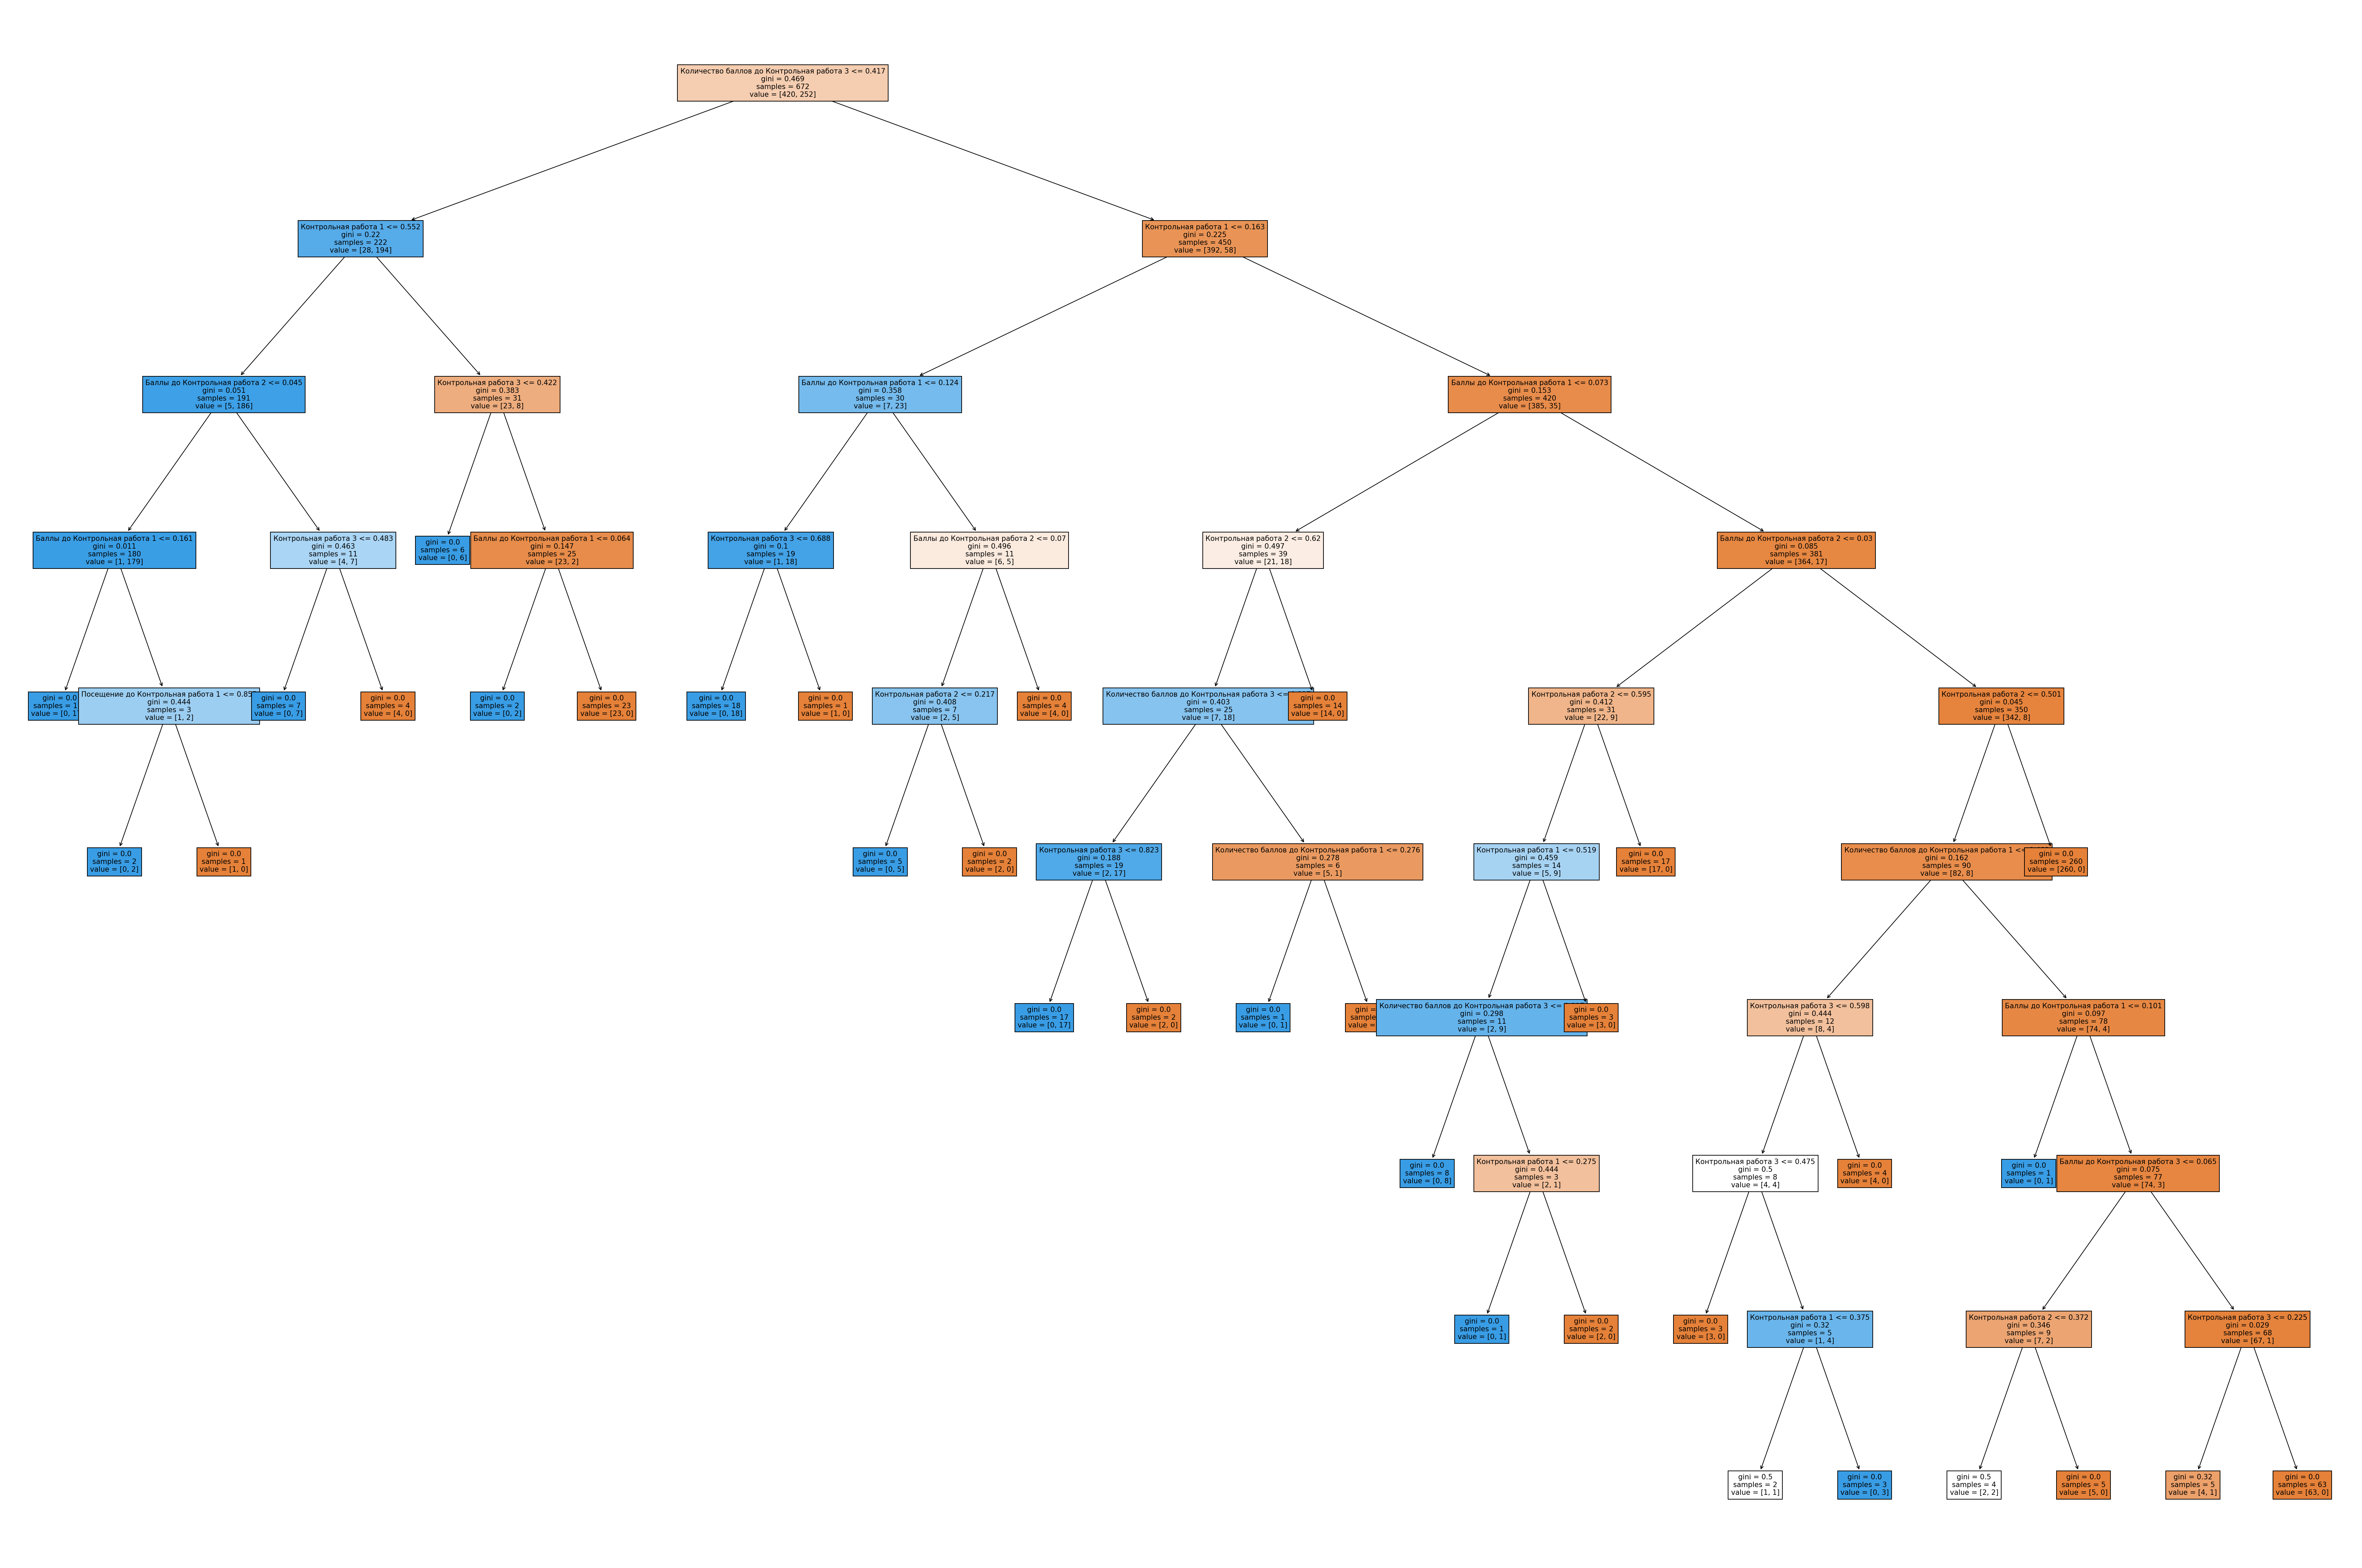

In [ ]:
# дерево решений
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
X, Y = PredictionSplit.SplitTestTrainPass(data, ex, ["Оценка"]+AnalysisFunc.before)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=27)
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(60,40),dpi=150, )
    plot_tree(model,filled=True,feature_names=X.columns, fontsize=10)
    plt.show()
#pruned tree поменяй на своё
pruned_tree = DecisionTreeClassifier(max_depth=9, random_state=0)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

**Сдача дисциплины**

In [ ]:
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование сдачи дисциплины")
    results = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)
    results_corr_more_01 = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModel(X, Y, models, 0.3, "f1")
        for key, val in pred_res.items():
            results[ex][key] = val

    display(results)

    print("Без направления")
    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка", "Направление"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModel(X, Y, models, 0.3, "f1")
        for key, val in pred_res.items():
            results[ex][key] = val

    display(results)

Данные: Original
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.83,0.87,0.92
Рандомный лес,0.82,0.85,0.89
Дерево решений,0.80,0.87,0.89
CatBoost,0.83,0.88,0.93
AdaBoostClassifier,0.84,0.89,0.91
Логистическая регрессия,0.85,0.91,0.94
SGDClassifier,0.85,0.92,0.95


Без направления


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.83,0.87,0.92
Рандомный лес,0.83,0.89,0.91
Дерево решений,0.80,0.87,0.89
CatBoost,0.83,0.88,0.93
AdaBoostClassifier,0.84,0.89,0.91
Логистическая регрессия,0.85,0.91,0.94
SGDClassifier,0.86,0.90,0.95


**Результаты контрольной**

In [ ]:
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование контрольных без учета оценок")
    results = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)
    results_corr_more_01 = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainTest(d, ex, ["Пол", "Оценка"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModel(X, Y, models_regres, 0.3, "mae")
        for key, val in pred_res.items():
            results[ex][key] = val *20

    display(results)

    print("Без направления")
    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainTest(d, ex, ["Пол", "Оценка", "Направление"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModel(X, Y, models_regres, 0.3, "mae")
        for key, val in pred_res.items():
            results[ex][key] = val *20

    display(results)

Данные: Original
Прогнозирование контрольных без учета оценок


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.62,3.18,2.8
Рандомный лес,3.44,3.26,2.98
CatBoostRegressor,3.5,3.16,2.78
AdaBoostRegressor,3.5,3.24,3.12
Ridge,3.56,3.04,2.84
LinearRegression,3.52,3.06,2.86


Без направления


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.62,3.18,2.8
Рандомный лес,3.5,3.28,2.86
CatBoostRegressor,3.5,3.16,2.78
AdaBoostRegressor,3.44,3.16,3.3
Ridge,3.56,3.04,2.84
LinearRegression,3.52,3.06,2.86


In [ ]:
# прогнозирование КР как классы
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование контрольных")
    results = pd.DataFrame(index=list(models_regres_classes.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainTest(d, ex, ["Пол", "Оценка"]+AnalysisFunc.before)
        Y = Y*20
        Y = Y.round(0)
        pred_res = PredictionResults.PredictionModel(X, Y, models_regres_classes, 0.3, "mae")
        for key, val in pred_res.items():
            results[ex][key] = val

    display(results)

Данные: Original
Прогнозирование контрольных


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,4.26,3.941,3.775
Логистическая регрессия,3.696,3.453,3.394
Наивный байес,4.609,3.602,3.526
Метод опорных векторов,3.744,3.661,3.498
Рандомный лес,4.163,3.478,3.436
Дерево решений,3.834,3.374,3.481
CatBoost,3.869,3.557,3.429
AdaBoostClassifier,4.325,4.0,4.038


# Прогнозирование данных текущего года
Данные прошлого года считаются обучающими, а данные этого года - тестовыми

**Сдача дисциплины**

In [21]:
print("Сравнение на реальных данных")
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование сдачи дисциплины")
    results = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка", "Направление"])
        x_, y_ = PredictionSplit.SplitTestTrainPass(dataReal, ex, ["Пол", "Оценка", "Направление"])
        results[ex] = ""
        # pred_res_matrix = PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models, "recall")
        Y = Y-1
        Y = Y.abs()
        y_ = y_-1
        y_ = y_.abs()
        pred_res_matrix = PredictionResults.PredictionModelNew(X, Y, x_, y_, models, "recall")
        for key, val in pred_res.items():
            results[ex][key] = "1: " + str(int(pred_res[key]* 100)) + "%,    0: " + str(int(pred_res_matrix[key]* 100)) + "%"


    display(results)

    print("Из данных для прогноза удалены уже получившие зачет:")
    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка", "Направление"])
        not_passed_yes, passed = AnalysisFunc.SplitAlreadyPassed(dataReal, ex)
        x_, y_ = PredictionSplit.SplitTestTrainPass(not_passed_yes, ex, ["Пол", "Оценка", "Направление"])
        print(f"Количество сдавших: {len(dataReal) - len(not_passed_yes)}, среди оставшихся всего сдавших в будущем: {len(not_passed_yes[not_passed_yes['Не сдал(-а)']==0])}")
        results[ex] = ""
        # pred_res_matrix = PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models, "recall")
        Y = Y-1
        Y = Y.abs()
        y_ = y_-1
        y_ = y_.abs()
        pred_res_matrix = PredictionResults.PredictionModelNew(X, Y, x_, y_, models, "recall")
        for key, val in pred_res.items():
            results[ex][key] = "1: " + str(int(pred_res[key]* 100)) + "%,    0: " + str(int(pred_res_matrix[key]* 100)) + "%"

    display(results)


Сравнение на реальных данных
Данные: Original
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,"1: 73%, 0: 92%","1: 75%, 0: 91%","1: 83%, 0: 91%"
Рандомный лес,"1: 61%, 0: 97%","1: 50%, 0: 99%","1: 61%, 0: 100%"
Дерево решений,"1: 81%, 0: 77%","1: 89%, 0: 84%","1: 86%, 0: 83%"
CatBoost,"1: 76%, 0: 90%","1: 84%, 0: 93%","1: 89%, 0: 94%"
AdaBoostClassifier,"1: 65%, 0: 97%","1: 75%, 0: 95%","1: 86%, 0: 94%"
Логистическая регрессия,"1: 75%, 0: 92%","1: 79%, 0: 93%","1: 91%, 0: 94%"
SGDClassifier,"1: 89%, 0: 94%","1: 81%, 0: 79%","1: 89%, 0: 80%"
RidgeClassifierCV,"1: 81%, 0: 87%","1: 89%, 0: 87%","1: 94%, 0: 85%"
NearestCentroid,"1: 74%, 0: 92%","1: 80%, 0: 92%","1: 87%, 0: 92%"
SVC,"1: 78%, 0: 89%","1: 81%, 0: 89%","1: 91%, 0: 91%"


Из данных для прогноза удалены уже получившие зачет:
Количество сдавших: 0, среди оставшихся всего сдавших в будущем: 669
Количество сдавших: 8, среди оставшихся всего сдавших в будущем: 661
Количество сдавших: 396, среди оставшихся всего сдавших в будущем: 273


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,"1: 73%, 0: 92%","1: 75%, 0: 91%","1: 83%, 0: 80%"
Рандомный лес,"1: 59%, 0: 97%","1: 56%, 0: 100%","1: 63%, 0: 96%"
Дерево решений,"1: 81%, 0: 77%","1: 89%, 0: 84%","1: 86%, 0: 72%"
CatBoost,"1: 76%, 0: 90%","1: 84%, 0: 93%","1: 89%, 0: 86%"
AdaBoostClassifier,"1: 65%, 0: 97%","1: 75%, 0: 95%","1: 86%, 0: 86%"
Логистическая регрессия,"1: 75%, 0: 92%","1: 79%, 0: 93%","1: 91%, 0: 85%"
SGDClassifier,"1: 90%, 0: 98%","1: 92%, 0: 87%","1: 85%, 0: 94%"
RidgeClassifierCV,"1: 81%, 0: 87%","1: 89%, 0: 86%","1: 94%, 0: 65%"
NearestCentroid,"1: 74%, 0: 92%","1: 80%, 0: 92%","1: 87%, 0: 82%"
SVC,"1: 78%, 0: 89%","1: 81%, 0: 89%","1: 91%, 0: 80%"


**Результаты контрольной**

In [ ]:
print("Сравнение на реальных данных")

for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование контрольных без процентов")
    results = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex, [ "Оценка", "Направление"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка", "Направление"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models_regres, "mae")
        for key, val in pred_res.items():
            results[ex][key] = f"{round(val * 20, 2)}"#100

    display(results)

Сравнение на реальных данных
Данные: Original
Прогнозирование контрольных без процентов


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.58,3.56,3.6
Рандомный лес,3.54,3.78,3.52
CatBoostRegressor,3.66,3.26,3.5
AdaBoostRegressor,3.52,3.16,3.74
Ridge,3.48,3.42,3.44
LinearRegression,3.58,3.2,3.56


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataReal.drop(columns=["Направление"], inplace=True)
data[:] = scaler.fit_transform(data[:])
dataReal[:] = scaler.fit_transform(dataReal[:])

In [ ]:
# прогнозирование и просмотр максимальной ошибки
for key_data, d in data_dict.items():
    print(f"Данные: {key_data}")
    results = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex, [ "Оценка", "Направление"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка", "Направление"]+AnalysisFunc.before)

        pred_res = {}
        for key, model in models_regres.items():
            model.fit(X, Y)
            data_prediction = model.predict(x_)
            data_prediction[data_prediction < 0] = 0

            res = pd.DataFrame()

            res[ex] = y_.round(2)* 20
            res['Прогнозированная контрольная'] = data_prediction.round(2)* 20
            res['Разница прогноза'] = res[ex] - res['Прогнозированная контрольная']
            mae = round(PredictionResults.accuracy_dict["mae"](y_.round(2), data_prediction.round(2))* 20, 3)
            pred_res[key] = f"{mae} / max={round(res['Разница прогноза'].abs().max(), 0)}"

        for key, val in pred_res.items():
            results[ex][key] = val

    display(results)

Данные: Original


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.58 / max=12.0,3.549 / max=16.0,3.6 / max=14.0
Рандомный лес,3.564 / max=13.0,4.535 / max=16.0,3.591 / max=15.0
CatBoostRegressor,3.659 / max=14.0,3.27 / max=15.0,3.501 / max=14.0
AdaBoostRegressor,3.557 / max=14.0,3.615 / max=18.0,3.69 / max=15.0
Ridge,3.48 / max=15.0,3.41 / max=16.0,3.445 / max=15.0
LinearRegression,3.586 / max=15.0,3.206 / max=17.0,3.558 / max=15.0
RidgeCV,3.52 / max=15.0,3.242 / max=17.0,3.445 / max=15.0


In [ ]:
# прогнозирование КР как классы

# прогнозирование и просмотр максимальной ошибки
for key_data, d in data_dict.items():
    print(f"Данные: {key_data}")
    results = pd.DataFrame(index=list(models_regres_classes.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex, [ "Оценка", "Направление"]+AnalysisFunc.before)
        Y = Y*20
        Y = Y.round(0)

        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка", "Направление"]+AnalysisFunc.before)
        y_ = y_*20
        y_ = y_.round(0)

        pred_res = {}
        for key, model in models_regres_classes.items():
            model.fit(X, Y)
            data_prediction = model.predict(x_)
            data_prediction[data_prediction < 0] = 0

            res = pd.DataFrame()

            res[ex] = y_
            res['Прогнозированная контрольная'] = data_prediction
            res['Разница прогноза'] = res[ex] - res['Прогнозированная контрольная']
            mae = round(PredictionResults.accuracy_dict["mae"](y_, data_prediction), 3)
            pred_res[key] = f"{mae} / max={round(res['Разница прогноза'].abs().max(), 0)}"

        for key, val in pred_res.items():
            results[ex][key] = val

    display(results)

Данные: Original


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.99 / max=18.0,4.668 / max=20.0,5.135 / max=20.0
Логистическая регрессия,3.524 / max=19.0,6.118 / max=19.0,5.019 / max=20.0
LinearDiscriminantAnalysis,3.814 / max=17.0,4.033 / max=20.0,4.125 / max=20.0
Рандомный лес,3.945 / max=18.0,4.988 / max=19.0,4.573 / max=20.0
Дерево решений,3.698 / max=17.0,6.127 / max=20.0,4.045 / max=19.0
CatBoost,3.68 / max=19.0,4.79 / max=19.0,4.609 / max=20.0
AdaBoostClassifier,4.186 / max=12.0,7.345 / max=20.0,6.663 / max=20.0


**Результаты контрольной**

Сохранение прогнозов в XLSX-файл

In [ ]:
# прогнозирование контрольных и соханение результатов
for key_data, d in data_dict.items():
    print(f"Данные: {key_data}")
    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex,[ "Оценка", "Направление"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка"]+AnalysisFunc.before)
        results = pd.DataFrame(columns=["Real "+ex]+list(models_regres.keys()))
        results["Real "+ex] = dataReal[ex].round(2)* 20
        for key, model in models_regres.items():
            model.fit(X, Y)
            data_prediction = model.predict(x_)
            data_prediction[data_prediction < 0] = 0
            results[key] = data_prediction.round(2)* 20
            mae = round(PredictionResults.accuracy_dict["mae"](y_.round(2), data_prediction.round(2)), 3)* 20
            print(f"{key}: спрогнозировано; mae = {mae}")

        BaseFuncs.SaveFileCSV(path = f"/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/",
            filename = f"ПиОА {key_data} ({ex}) DIV20", results = results, csv = False)

        display(results)

In [ ]:
# прогнозирование сдачи и соханение результатов
for key_data, d in data_dict.items():
    print(f"Данные: {key_data}")
    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainPass(d, ex,[ "Оценка", "Направление"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainPass(dataReal, ex, [ "Оценка", "Направление"]+AnalysisFunc.before)
        results = pd.DataFrame(columns=["Real "+ex]+list(models.keys()))
        results["Real "+ex] = dataReal["Не сдал(-а)"].round(2)
        for key, model in models.items():
            model.fit(X, Y)
            data_prediction = model.predict(x_)
            results[key] = data_prediction
            recall = round(PredictionResults.accuracy_dict["recall"](y_, data_prediction), 3)
            print(f"{key}: спрогнозировано; recall = {recall}")

        BaseFuncs.SaveFileCSV(path = f"/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/",
            filename = f"ПиОА {key_data} сдача ({ex}) DIV20", results = results, csv = False)

        display(results)

Данные: Original
k-ближайших соседей: спрогнозировано; recall = 0.719
Рандомный лес: спрогнозировано; recall = 0.743
Дерево решений: спрогнозировано; recall = 0.788
CatBoost: спрогнозировано; recall = 0.736
AdaBoostClassifier: спрогнозировано; recall = 0.613


,Real Контрольная работа 1,k-ближайших соседей,Рандомный лес,Дерево решений,CatBoost,AdaBoostClassifier
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
956,1,1,1,1,1,0
957,0,1,0,1,0,0
958,0,0,0,0,0,0
959,0,0,0,0,0,0


k-ближайших соседей: спрогнозировано; recall = 0.928
Рандомный лес: спрогнозировано; recall = 0.88
Дерево решений: спрогнозировано; recall = 0.856
CatBoost: спрогнозировано; recall = 0.853
AdaBoostClassifier: спрогнозировано; recall = 0.938


,Real Контрольная работа 2,k-ближайших соседей,Рандомный лес,Дерево решений,CatBoost,AdaBoostClassifier
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
956,1,1,1,1,1,1
957,0,1,1,1,0,1
958,0,0,0,0,0,0
959,0,0,0,0,0,0


k-ближайших соседей: спрогнозировано; recall = 0.99
Рандомный лес: спрогнозировано; recall = 0.983
Дерево решений: спрогнозировано; recall = 0.973
CatBoost: спрогнозировано; recall = 0.973
AdaBoostClassifier: спрогнозировано; recall = 0.993


,Real Контрольная работа 3,k-ближайших соседей,Рандомный лес,Дерево решений,CatBoost,AdaBoostClassifier
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
956,1,1,1,1,1,1
957,0,1,1,0,0,1
958,0,1,0,0,0,0
959,0,0,0,0,0,0


In [9]:
!pip install lazypredict

In [10]:
import lazypredict
from sklearn.metrics import recall_score, f1_score
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X, Y, = PredictionSplit.SplitTestTrainPass(data, "Контрольная работа 2", ["Пол", "Оценка", "Направление"])
x_, y_, = PredictionSplit.SplitTestTrainPass(AnalysisFunc.SplitAlreadyPassed(dataReal, "Контрольная работа 2")[0], "Контрольная работа 2", ["Пол", "Оценка", "Направление"])
# X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.3,random_state =27)

clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric= recall_score)
models_lazy, predictions = clf.fit(X, x_, Y, y_)
models_lazy

 28%|██▊       | 8/29 [00:00<00:01, 20.75it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 93%|█████████▎| 27/29 [00:02<00:00,  9.64it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:03<00:00,  9.58it/s]

[LightGBM] [Info] Number of positive: 349, number of negative: 612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1002
[LightGBM] [Info] Number of data points in the train set: 961, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363163 -> initscore=-0.561660
[LightGBM] [Info] Start training from score -0.561660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,recall_score,Time Taken
Model,,,,,,
SGDClassifier,0.87,0.90,0.90,0.88,0.97,0.08
CalibratedClassifierCV,0.88,0.90,0.90,0.89,0.93,0.10
SVC,0.91,0.90,0.90,0.91,0.87,0.12
LogisticRegression,0.88,0.90,0.90,0.89,0.93,0.10
LinearSVC,0.88,0.90,0.90,0.88,0.93,0.10
LGBMClassifier,0.89,0.89,0.89,0.89,0.91,0.21
RandomForestClassifier,0.90,0.89,0.89,0.90,0.85,0.41
RidgeClassifier,0.87,0.89,0.89,0.87,0.93,0.05
LinearDiscriminantAnalysis,0.87,0.88,0.88,0.87,0.93,0.06


In [ ]:
from sklearn.metrics import mean_absolute_error
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
X, Y, = PredictionSplit.SplitTestTrainTest(data, "Контрольная работа 2", ["Пол", "Оценка", "Направление"])
Y = Y*20
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.3,random_state =27)

clf = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=mean_absolute_error )
models_lazy, predictions = clf.fit(X_train, X_test, y_train, y_test)
models_lazy

In [ ]:
X, Y, = PredictionSplit.SplitTestTrainTest(data, "Контрольная работа 2", [ "Оценка", "Направление"]+AnalysisFunc.before)
Y = Y*20
Y = Y.round(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.3,random_state =27)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric= mean_absolute_error)
models_lazy, predictions = clf.fit(X_train, X_test, y_train, y_test)
models_lazy

 97%|█████████▋| 28/29 [00:11<00:00,  3.78it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 672, number of used features: 10
[LightGBM] [Info] Start training from score -2.021622
[LightGBM] [Info] Start training from score -5.411646
[LightGBM] [Info] Start training from score -3.677045
[LightGBM] [Info] Start training from score -3.677045
[LightGBM] [Info] Start training from score -4.112363
[LightGBM] [Info] Start training from score -3.514526
[LightGBM] [Info] Start training from score -3.565819
[LightGBM] [Info] Start training from score -3.109061
[LightGBM] [Info] Start training from score -2.749058
[LightGBM] [Info] Start training from score -3.178054
[LightGBM] [Info] Start training from score -2.618438
[LightGBM] [Info] Start training from score -2.872672
[L

100%|██████████| 29/29 [00:13<00:00,  2.20it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,mean_absolute_error,Time Taken
Model,,,,,,
NearestCentroid,0.16,0.15,None,0.15,3.94,0.05
Perceptron,0.14,0.13,None,0.13,4.69,0.11
XGBClassifier,0.17,0.13,None,0.17,3.98,0.82
LinearDiscriminantAnalysis,0.19,0.13,None,0.19,3.38,0.06
LogisticRegression,0.19,0.12,None,0.17,3.65,0.16
QuadraticDiscriminantAnalysis,0.18,0.12,None,0.17,3.85,0.07
CalibratedClassifierCV,0.19,0.12,None,0.13,3.99,4.89
BaggingClassifier,0.18,0.11,None,0.17,3.83,0.13
GaussianNB,0.18,0.11,None,0.16,3.61,0.06
